# Рубежный контроль №1
**Студент:** Кривцов Н.А.  
**Группа:** ИУ5-22М   
**Вариант:** 7  
**Задачи:** 7, 27  
**Доп. требование:** гистограмма

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка и просмотр датасета

Датасет содержит данные о качестве питьевой воды в 3276 водоемах мира. Для анализа качества используются 9 числовых показателей, таких как pH, жесткость и концентрация различных вредных веществ.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ММО/water_potability.csv')

In [3]:
data.shape

(3276, 10)

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#1. Задача 7
Для набора данных провеcти устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

In [5]:
# Количество пропусков
[(i, data[i].isnull().sum()) for i in data.columns]

[('ph', 491),
 ('Hardness', 0),
 ('Solids', 0),
 ('Chloramines', 0),
 ('Sulfate', 781),
 ('Conductivity', 0),
 ('Organic_carbon', 0),
 ('Trihalomethanes', 162),
 ('Turbidity', 0),
 ('Potability', 0)]

Признак `Trihalomethanes` содержит наименьшее количество пропусков, именно их и следует устранить.

In [6]:
col = data['Trihalomethanes']
print("Пропусков: {}".format(col.isnull().sum()))

Пропусков: 162


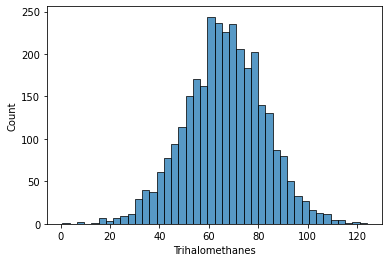

In [7]:
sns.histplot(x=col)

In [8]:
new_col = col.fillna(col.median())

In [9]:
print("Пропусков: {}".format(new_col.isnull().sum()))

Пропусков: 0


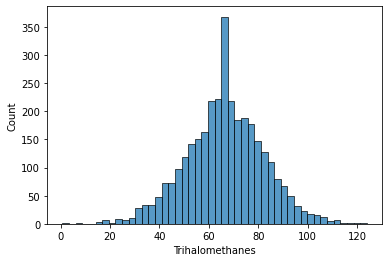

In [10]:
sns.histplot(x=new_col)

#2. Задача 27
Для набора данных для одного (произвольного) числового признака провести обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

---

Т.к. метод замены выбросов на основе 5% и 95% квантилей применим только для признаков с распределением, подобным нормальному, построим `distplot` для всех признаков датасета и выберем признак с подходящим распределением.

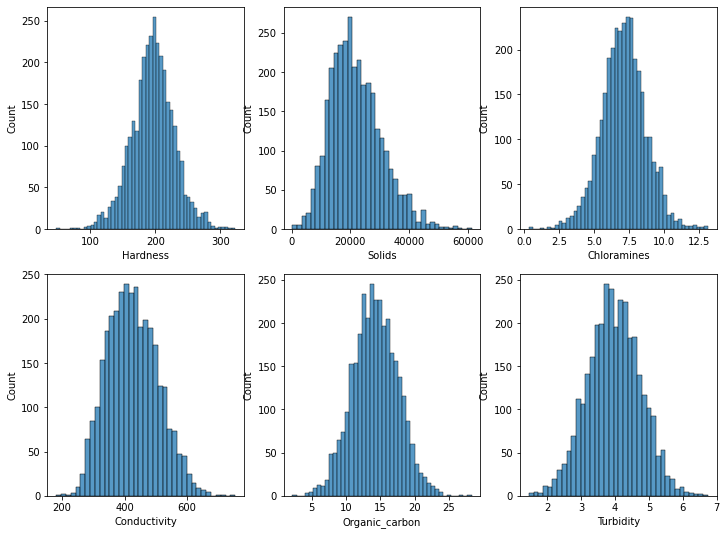

In [18]:
new_data = data.dropna(axis=1)
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 9))

for i, column in enumerate(new_data.iloc[:,:-1]):
  sns.histplot(new_data[column], ax=axes[i//n_cols, i%n_cols])

Все признаки соответствуют распределениям, подобным нормальному (возможное исключение - `Solids` с вытянутым правым хвостом). Замена выбросов будет проведена для признака `Turbidity`.

In [32]:
col = data['Turbidity']

# верхняя и нижняя границы
lower_bound = col.quantile(0.05)
upper_bound = col.quantile(0.95)

print(lower_bound, upper_bound)

2.6842792341297113 5.2209245250355805


In [33]:
new_col = np.where(col > upper_bound, upper_bound, np.where(col < lower_bound, lower_bound, col))

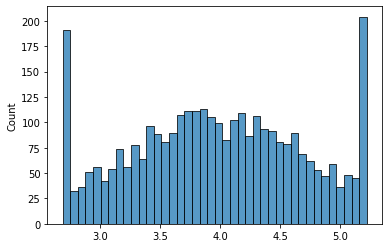

In [34]:
sns.histplot(new_col, bins=40)